## Imports

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this analysis, I use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). In addition, I will be placing this information in the context of global CO2 emissions and commenting on any trends or significant observations.



# Data:
In this notebook, I'll be using a collection of CO2 and greenhouse gas emissions data maintained by Our World In Data : https://github.com/owid/co2-data, accessed Apr. 18, 2023. This data is actively maintained and updated by Our World in Data. The data includes figures such as the CO2 emissions of individual countries, which will be the most relevant data in this notebook.

## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nocheazul/co2emissions/main/owid-co2-data.csv')

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [4]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [5]:
df_countries = df.loc[df['country'].isin(non_countries) == False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

.head() function used to display thr first five entries in the data frame

In [6]:
df_countries.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


Since the data frame is organized alphabetically, the head is the first five entriesfor Afghanistan's CO2 and greenhouse gas emissions

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution

use .info() function on our data frame that includes only countries (df_countries)

In [7]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

Receive information about every column. "Non-null" values refer to not-empty values. If number is less than amount of rows (39638), then there are mssing entries in that column. We can see the total amunt of missing entries per column by using the .isna() and .sum() functions:

In [8]:
df_countries.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

There are many columns, such as the population, gdp, or trade_co2 columns which have missing (null) values.

##### $\rightarrow$ What years are present in the data set?

##### Solution

Use .agg(['min', 'max') function to show the minimum and maximum values of a column in the data frame. Showing the minimum and maximum values of the year column shows us the range of years in the data set:

In [77]:
df_countries['year'].agg(['min','max'])

min    1750
max    2021
Name: year, dtype: int64

The data set spans from the year 1750 to 2021

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

Sort all data frame entries with the year 2020 by descending CO2 emission column values & show the top 10 (via .head()):

In [78]:
df_countries[df_countries['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


The top 10 CO2 emitters are China, United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia, and South Korea. We can define make these countries into a list:

In [12]:
top_ten_emitters = ['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea']

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

Use Seaborn & Matplotlib to produce a histogram with 45 bins:

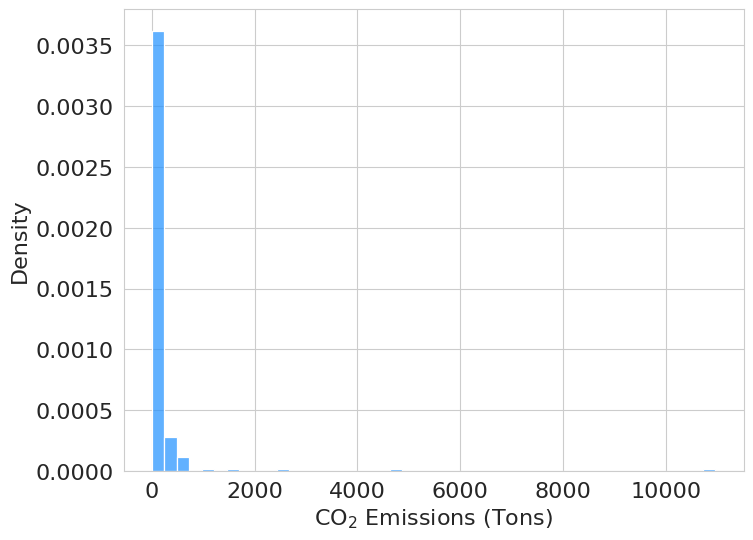

In [91]:
# set fig size
plt.figure(figsize = (8,6))

# produce histogram
sns.histplot(data = df_countries[df_countries['year'] == 2020],
             x = 'co2',
             bins = 45,
             color = 'dodgerblue',
             alpha = 0.7,
             stat = 'density')

# Label axes
plt.xlabel('CO$_2$ Emissions (Tons)',fontsize = 16)
plt.ylabel('Density', fontsize = 16)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The histogram shows that a vast majority of countries emitted less than 1000 tons of CO2 in a given year. In addition, very few countries emitted more than 1000 tons of CO2 and extremely few countries emitted more than 2000 tons.

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

Use Seaborn to create a boxplot & strip plot of 2020's CO2 emissions data by country:

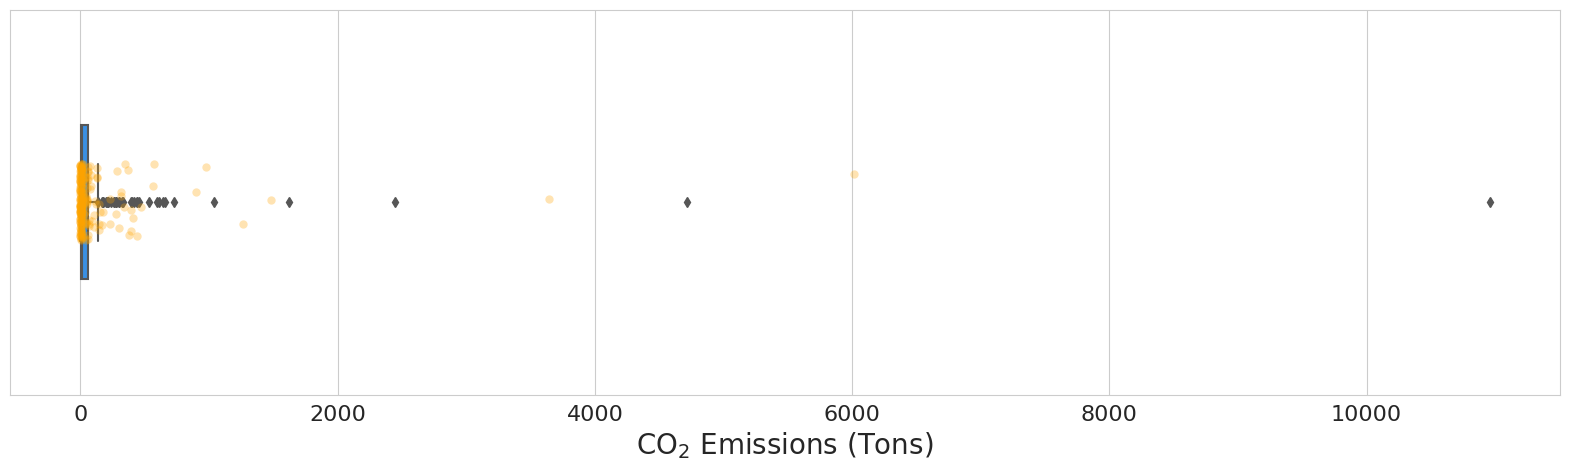

In [11]:
# set fig size
plt.figure(figsize = (20,5))

# Use Seaborn to make the boxplot
sns.boxplot(data = df_countries[df_countries['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.4, whis = 1.5)

# Use Seaborn to make the strip plot
sns.stripplot(data = df_countries[df_countries['year'] == 2000], x = 'co2', color = 'orange', size = 6, alpha = 0.3)

# Label axes
plt.xlabel('CO$_2$ Emissions (Tons)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

Box plot is consistent with histogram, showing that the mean and interquartile range of the data set is well below 1000 tons. Strip plot shows that a large majority of data points are near-zero values.

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

Yes. Outliers in a data distribution are those points which land more than 1.5 times the interquartile range past the third quartile. In a box plot, the whiskers of the plot denote the range past which points are considered outliers. Because there are more than 10 points outside of the whiskers, then we know that the top 10 emitters (and then some) are outliers in our distribution.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [13]:
# Create version of data frame that only includes the list of top ten emitting countries defined earlier
df_top10 = df_countries.loc[df_countries['country'].isin(top_ten_emitters)]

# Create version of df_top10 which only includes data entries with years between 1971 and 2020
df_top10_restricted = df_top10.loc[df_top10['year'].isin(list(range(1971,2020+1)))]

In [14]:
# Prepare solution string
txt = 'There are {} missing carbon dioxide emmission values for the top 10 emitters of 2020'

# Use .isna() and .sum() function to find how many missing CO2 emission values there are:
print(txt.format(df_top10_restricted.isna().sum()['co2']))

There are 0 missing carbon dioxide emmission values for the top 10 emitters of 2020


##### Solution

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

Use Seaborn to make a line plot with the x-axis being time in years, limiting the range of years to 1971-2020.

Text(0, 0.5, 'Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)')

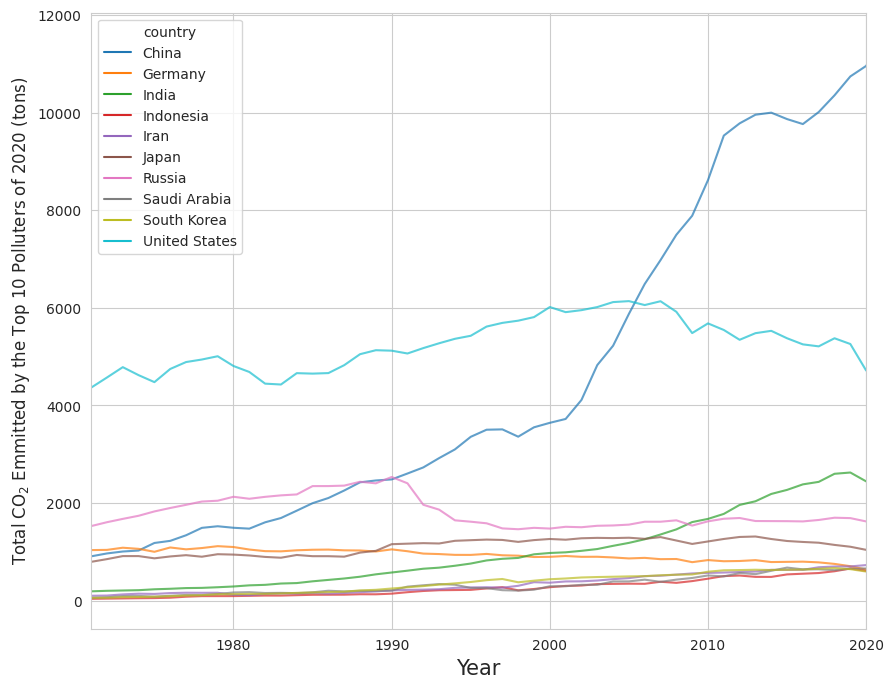

In [84]:
# set fig size
plt.figure(figsize = (10,8))

# Produce Time Plot
sns.lineplot(data = df_top10,
             x = 'year',
             y = 'co2',
             hue = 'country',
             alpha = 0.7)

# Label and restrict x-axis to years in question
plt.xlim(1971,2020)
plt.xlabel('Year', fontsize = 15)

# Label y-axis
plt.ylabel('Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)', fontsize = 12)

Graph shows that most of the top 10 emitting countries' CO2 emissions more or less slowly increased across 1971 to 2020, with the exceptions of China, whose emissions started rising rapidly after the year 2000, and Russia, whose emissions started slowly decreasing after 1990.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

Use Seaborn to create the same time plot. Add mean line using seaborn and .mean() function:

<ipython-input-19-012c409b8c74>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')


<Axes: xlabel='Year', ylabel='Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)'>

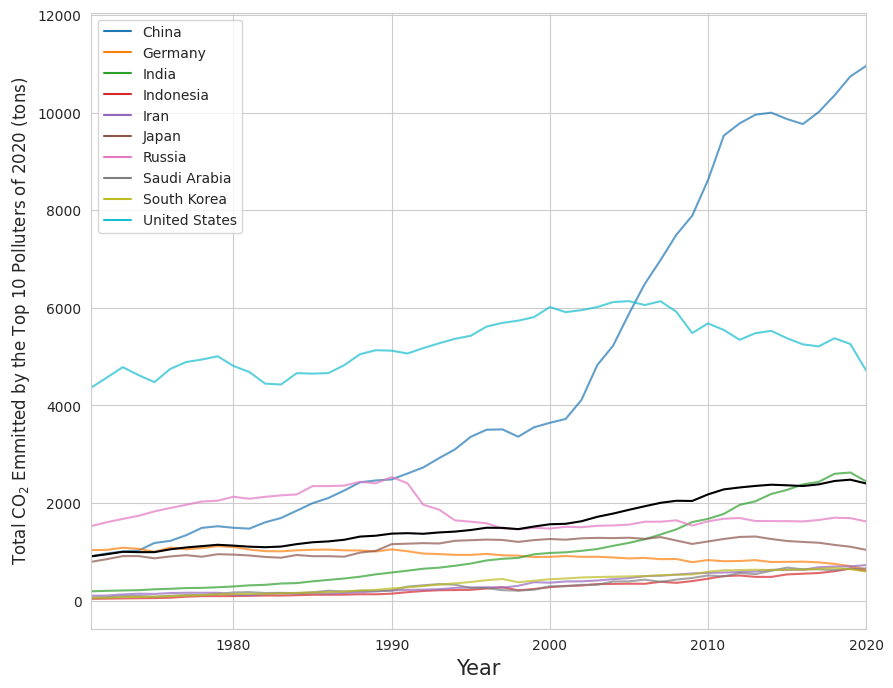

In [19]:
# set fig size
plt.figure(figsize = (10,8))

# Produce Time Plot
sns.lineplot(data = df_top10,
             x = 'year',
             y = 'co2',
             hue = 'country',
             alpha = 0.7)

# Label and restrict x-axis to years in question
plt.xlim(1971,2020)
plt.xlabel('Year', fontsize = 15)

# Label y-axis
plt.ylabel('Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)', fontsize = 12)

# Add Mean Line
sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')

The mean line shows that, like most of the listed countries, the average CO2 emissions of the top 10 emitters rose slowly but steadily over the time range shown.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

Using Matplotlib, we can change the scale of the y-axis of the seaborn plot to be in a log scale:

<ipython-input-20-b83b9c42fad1>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')


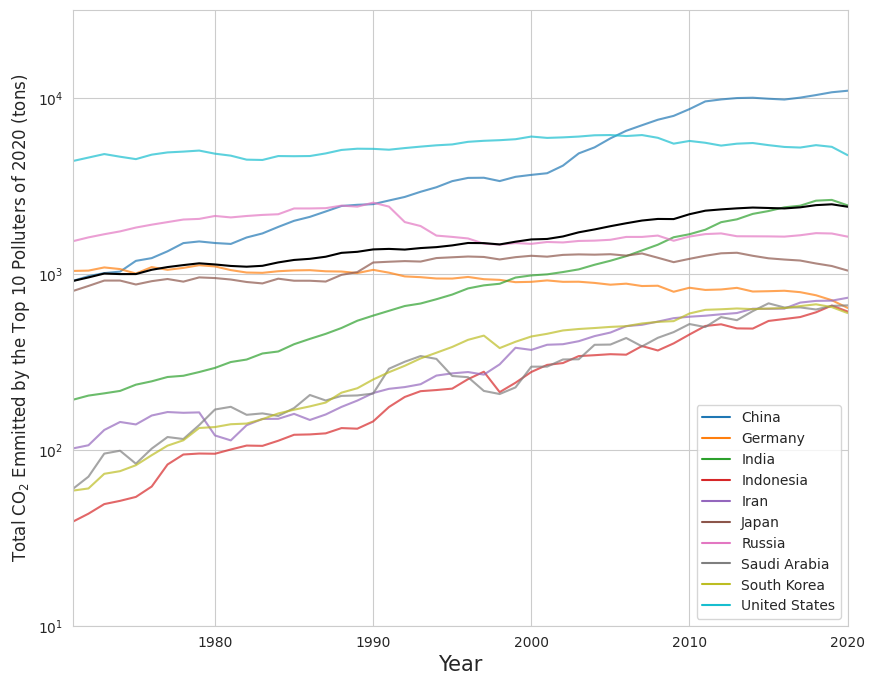

In [20]:
# set fig size
plt.figure(figsize = (10,8))

# Produce Time Plot
sns.lineplot(data = df_top10,
             x = 'year',
             y = 'co2',
             hue = 'country',
             alpha = 0.7)

# Restrict x-axis to years in question & y-axis to relevant range
plt.xlim(1971,2020)
plt.ylim(10**1, 10**4.5)

# Label x and y axes
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)', fontsize = 12)

# change the scale of the y-axis to a log scale
plt.yscale('log')


sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')

Results in a more easily readable graph with lines that are easier to distinguish from one another.

# Analysis

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

**Through my analyses, one can conclude that the top 10 emitters of carbon dioxide on our planet have a disproportionate impact on global carbon dioxide emissions. As shown, today's top 10 emitting countries such as countries such as China, the United States, and India have carbon footprints that are outliers in global carbon dioxide emissions.**

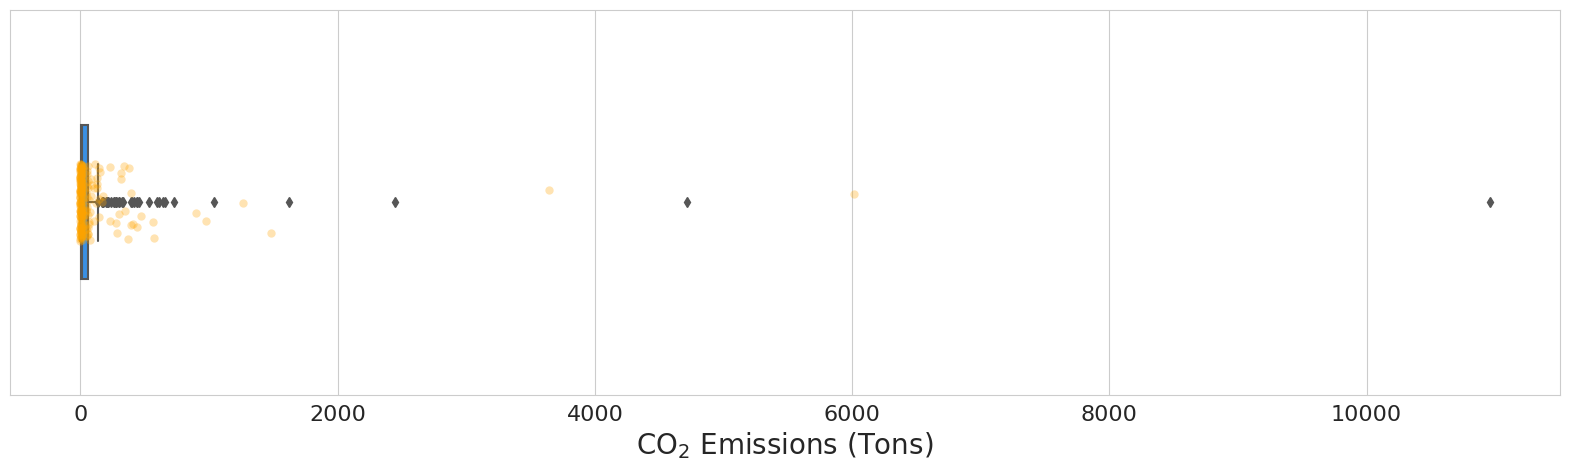

In [21]:
# set fig size
plt.figure(figsize = (20,5))

# Use Seaborn to make the boxplot
sns.boxplot(data = df_countries[df_countries['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.4, whis = 1.5)

# Use Seaborn to make the strip plot
sns.stripplot(data = df_countries[df_countries['year'] == 2000], x = 'co2', color = 'orange', size = 6, alpha = 0.3)

# Label axes
plt.xlabel('CO$_2$ Emissions (Tons)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

In [22]:
df_countries[df_countries['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


**Over the last 50 years, the carbon dioxide emissions of these ten countries have continually risen.**

<ipython-input-23-c701d02f6f08>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')


<Axes: xlabel='Year', ylabel='Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)'>

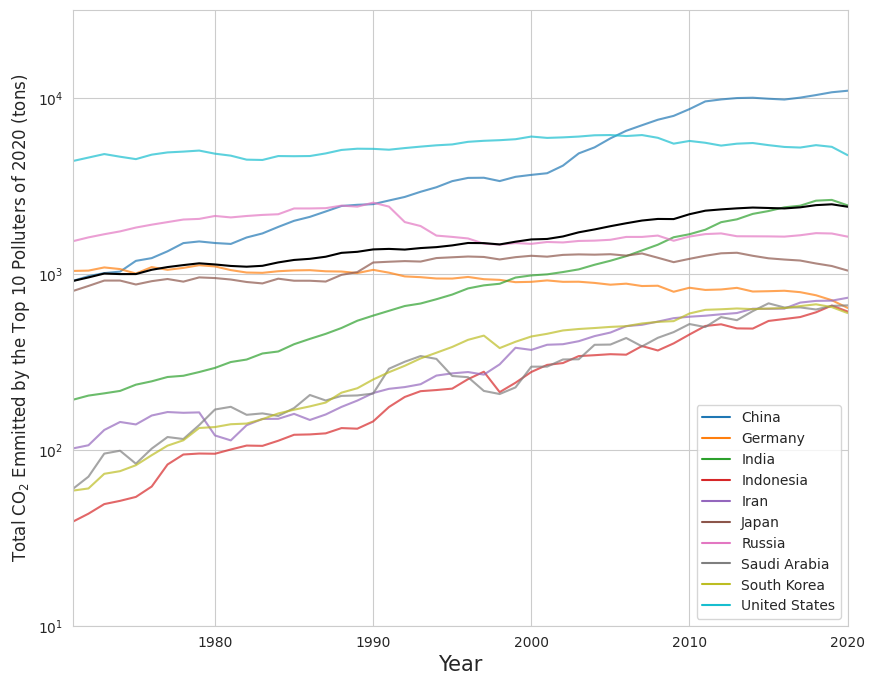

In [23]:
# set fig size
plt.figure(figsize = (10,8))

# Produce Time Plot
sns.lineplot(data = df_top10,
             x = 'year',
             y = 'co2',
             hue = 'country',
             alpha = 0.7)

# Restrict x-axis to years in question & y-axis to relevant range
plt.xlim(1971,2020)
plt.ylim(10**1, 10**4.5)

# Label x and y axes
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)', fontsize = 12)

# change the scale of the y-axis to a log scale
plt.yscale('log')


sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')

**In recent years, however, the carbon dioxide emissions of many of these countries seem to be plateauing or even beginning to decrease. Time will only tell if this will be a sustained decline or merely another small dip within a larger upward trend.**

<ipython-input-28-2bd85d4eab51>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')


<Axes: xlabel='Year', ylabel='Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)'>

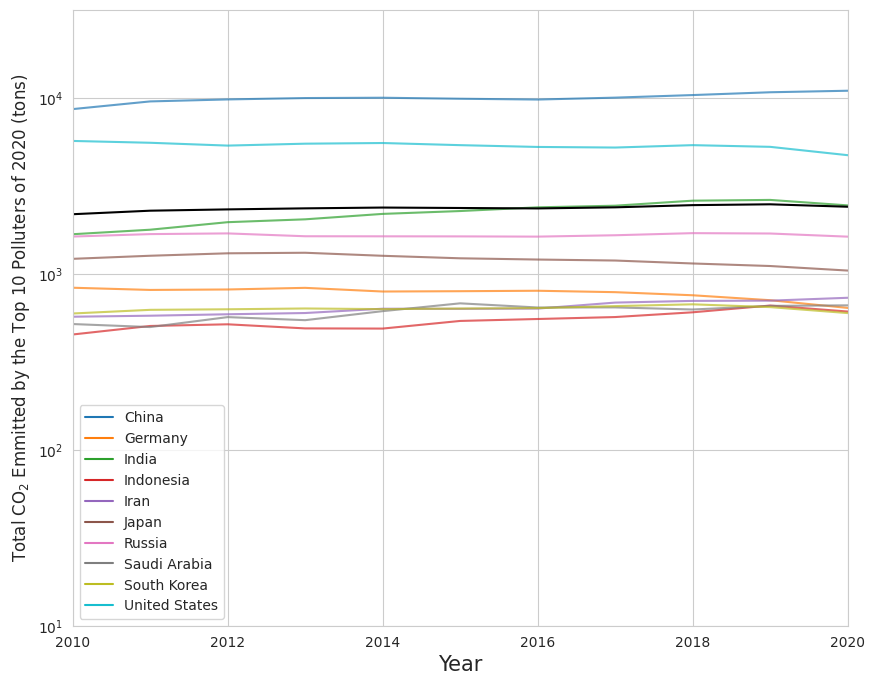

In [28]:
# set fig size
plt.figure(figsize = (10,8))

# Produce Time Plot
sns.lineplot(data = df_top10,
             x = 'year',
             y = 'co2',
             hue = 'country',
             alpha = 0.7)

# Restrict x-axis to years in question & y-axis to relevant range
plt.xlim(2010,2020)
plt.ylim(10**1, 10**4.5)

# Label x and y axes
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total CO$_2$ Emmitted by the Top 10 Polluters of 2020 (tons)', fontsize = 12)

# change the scale of the y-axis to a log scale
plt.yscale('log')

sns.lineplot(data = df_top10.groupby('year').mean(), x = 'year', y ='co2', color = 'k')